## Macrophage integration from multiple inflamed tissues
### Fan Zhang
### 2020-06-04

In [3]:
suppressMessages({
                    library(data.table)
                    library(reticulate)
                    library(Rcpp)
                    library(scales)
                    library(irlba)
                    library(singlecellmethods)
                    library(parallel)
                    library(pbapply)
                    library(patchwork)
                    library(pheatmap)
                    library(entropy)
                    library(Rtsne)
                    library(loe)
                    library(igraph)
                    library(viridis)
                    library(RColorBrewer)
                    library(matrixStats)
                    library(plyr)
                    library(parallel)   
                    library(harmony)
                    library(magrittr)
                    library(gridExtra)
                    library(ggthemes)
                    library(cowplot)
                    library(reticulate)
                    library(ggbeeswarm)
                    library(ggrepel)
                    library(plyr)
                    library(ggplot2)
                    library(gridExtra)
                    library(ggthemes)
                    library(dplyr)
                    library(RColorBrewer)
                    library(ggbeeswarm)
                    library(ggrepel)
                    library(MASS) 
                    library(matrixStats)
                    library(viridis)
                    library(grid)
                    require(gdata)
                    require(gridExtra)
                 })


meta_colors <- list(

  disease = c(
            "healthy" = "#B3B3B3",
            "mild"   = "#66A61E",
            "severe" = "#A6761D",
            "Inflamed UC" = "#A6761D", 
            "Non-inflamed UC" = "#E6AB02", 
            "Healthy Colon" = "#E5D8BD", 
            "Healthy Kidney" = "#A6CEE3",
            "Healthy Lung" = "#C7EAE5", 
            "Polymyositis Lung" = "#80CDC1",
            "SS Lung" = "#003C30",
            "HP Lung" = "#35978F",
            "Crohn" = "#FF7F00", 
            "SLE Kidney" = "#1F78B4",   
            "RA Synovium" =  "#E31A1C",  
            "OA Synovium"  =  "black", 
            "Inflamed IBD" = "#A6761D", 
            "Non-inflamed IBD" = "#E6AB02", 
            "healthy (IBD)" = "#E5D8BD", 
            "Ctrl" = "#C7EAE5", 
            "Polymyositis" = "#80CDC1",
            "Polymyositis lung" = "#80CDC1",
            "SS lung" = "#003C30",
            "Hypersensitivity pneumonitis" = "#35978F",
            "HP lung" = "#35978F",  
            "SLE" = "#1F78B4",   
            "RA" =  "#E31A1C", 
            "OA"  =  "black"
  ),
    
    
  "dataset" = c(    
            "AMP SLE Phase 1 Celseq" = "#006837",
            "AMP SLE Phase 1 Fluidigm" = "#ADDD8E",
            "RA" = "#6A3D9A", 
            "AMP RA" = "#6A3D9A", 
            "AMP RA Phase 1" = "#E31A1C",
            "Rahul" = "#FC8D62",
            "Crohn (Venema)" = "#FF7F00", 
            "UC (Smillie)" = "#A6761D",
            "Lung disease (Reyfman)" = "#7570B3",
            "AMP SLE" = "#1F78B4", 
            "RA" = "#E31A1C"
  )
)

set1 = c( "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628", "#F781BF", "#999999")
set3 = c("#8DD3C7", "#FFFFB3", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#B3DE69", "#FCCDE5", "#D9D9D9", "#BC80BD", "#CCEBC5", "#FFED6F")
set2 = c("#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3")
colors37 = c("#466791","#60bf37","#953ada","#4fbe6c","#ce49d3","#a7b43d","#5a51dc","#d49f36","#552095","#507f2d","#db37aa","#84b67c","#a06fda","#df462a",
             "#5b83db","#c76c2d","#4f49a3","#82702d","#dd6bbb","#334c22","#d83979","#55baad","#dc4555","#62aad3","#8c3025","#417d61","#862977","#bba672",
             "#403367","#da8a6d","#a79cd4","#71482c","#c689d0","#6b2940","#d593a7","#895c8b","#bd5975")

In [4]:
meta_colors <- list(

  disease = c(
    "Healthy BALF" = "#B3B3B3",
    "Mild COVID-19"   = "#B2DF8A", 
    "Severe COVID-19" = "#33A02C",
    "Healthy BALF" = "#B3B3B3",
    "Mild BALF"   = "#B2DF8A", 
    "Severe BALF" = "#33A02C",
    "Inflamed UC" = "#A6761D", 
    "Non-inflamed UC" = "#E6AB02", 
    "Healthy colon" = "#E5D8BD", 
    "Healthy kidney" = "#A6CEE3",
    "Healthy Lung" = "#C7EAE5", # healthy vs Pulmonary Fibrosis
    "Polymyositis lung" = "#80CDC1",
    "SS Lung" = "#003C30",
    "Systemic sclerosis lung" = "#003C30",
    "HP Lung" = "#35978F",
    "Hypersensitivity pneumonitis lung" = "#35978F",
    "Crohn" = "#FF7F00", 
    "Inflamed Crohn" = "#FF7F00", 
    "Non-inflamed Crohn" = "#D9D9D9",  
    "Healthy kidney" = "#1F8888",
    "SLE kidney" = "#1F78B4",   
    "RA synovium" =  "#E31A1C", #"#6A3D9A", 
    "OA synovium"  =  "#FB9A99", # "#FB9A99", # "#CAB2D6",
    "Inflamed IBD" = "#A6761D", 
    "Non-inflamed IBD" = "#E6AB02", 
    "healthy (IBD)" = "#E5D8BD", 
    "Ctrl" = "#C7EAE5", # healthy vs Pulmonary Fibrosis
    "Polymyositis" = "#80CDC1",
    "Polymyositis lung" = "#80CDC1",
    "Systemic sclerosis" = "#003C30",
    "SS lung" = "#003C30",
    "Hypersensitivity pneumonitis" = "#35978F",
    "HP lung" = "#35978F",  
    "SLE" = "#1F78B4",   
    "RA" =  "#E31A1C", #"#6A3D9A", 
    "OA"  =  "black"
  ),
    

    
  "dataset" = c(    
    "AMP SLE Phase 1 Celseq" = "#006837",
    "RA" = "#6A3D9A", # "#E31A1C",  
    "AMP RA" = "#6A3D9A", # "#E31A1C",  
    "AMP RA Phase 1" = "#E31A1C",
    "Rahul" = "#FC8D62",
    "Crohn (Venema)" = "#FF7F00", 
    "UC (Smillie)" = "#A6761D",
    "Lung disease (Reyfman)" = "#7570B3",
    "AMP SLE" = "#1F78B4", 
    "RA" = "#E31A1C"
  )

)

In [2]:
# Functions
FindVariableGenesBatch <- function(exprs_mat, meta_df, genes_exclude = NULL, ngenes_use = 1e3, expr_min = .1) {
    if (!is.null(genes_exclude)) {
        genes_use <- setdiff(row.names(exprs_mat), genes_exclude)
    }
    x_res <- split(meta_df$cell, meta_df$sample) %>% lapply(function(x) {
        FindVariableGenesSeurat(exprs_mat[genes_use, x]) %>% 
            subset(gene.mean >= expr_min) %>% 
            tibble::rownames_to_column("gene") %>% 
            dplyr::arrange(-gene.dispersion) %>%
            head(ngenes_use)
    })
    data.table(Reduce(rbind, x_res))[, .N, by = gene][order(-N)]    
}



FindVariableGenesSeurat <- function (data, x.low.cutoff = 0.1, x.high.cutoff = 8,
                                     y.cutoff = 1, y.high.cutoff = Inf, num.bin = 0,
                                     binning.method = "equal_width", sort.results = TRUE,
                                     display.progress = TRUE, ...)
{
    genes.use <- rownames(data)
    if (class(data) != "dgCMatrix") {
        data <- as(as.matrix(data), "dgCMatrix")
    }
    ## (1) get means and variances
    gene.mean <- FastExpMean(data, display.progress)
    names(gene.mean) <- genes.use
    gene.dispersion <- FastLogVMR(data, display.progress)
    names(gene.dispersion) <- genes.use

    gene.dispersion[is.na(x = gene.dispersion)] <- 0
    gene.mean[is.na(x = gene.mean)] <- 0

    mv.df <- data.frame(gene.mean, gene.dispersion)
    rownames(mv.df) <- rownames(data)

    ## (OPTIONAL) do the binning correction
    if (num.bin > 0) {
      if (binning.method == "equal_width") {
          data_x_bin <- cut(x = gene.mean, breaks = num.bin)
      }
      else if (binning.method == "equal_frequency") {
          data_x_bin <- cut(x = gene.mean, breaks = c(-1, quantile(gene.mean[gene.mean >
              0], probs = seq(0, 1, length.out = num.bin))))
     }
      else {
          stop(paste0("Invalid selection: '", binning.method,
              "' for 'binning.method'."))
      }
      names(x = data_x_bin) <- names(x = gene.mean)
      mean_y <- tapply(X = gene.dispersion, INDEX = data_x_bin,
          FUN = mean)
      sd_y <- tapply(X = gene.dispersion, INDEX = data_x_bin,
          FUN = sd)
      gene.dispersion.scaled <- (gene.dispersion - mean_y[as.numeric(x = data_x_bin)])/sd_y[as.numeric(x = data_x_bin)]
      gene.dispersion.scaled[is.na(x = gene.dispersion.scaled)] <- 0
      ##names(gene.dispersion.scaled) <- names(gene.mean)

      mv.df$gene.dispersion.scaled <- gene.dispersion.scaled
    }

    return(mv.df)
}

environment(FindVariableGenesSeurat) <- asNamespace("Seurat")

ScaleDataSeurat <- function (data.use, margin = 1, scale.max = 10,
                                block.size = 1000) {

    if (margin == 2) data.use %<>% t
    max.block <- ceiling(nrow(data.use)/block.size)

    ## Define data and functions to use in sparse and dense cases
    if (class(data.use) == "dgCMatrix" | class(data.use) == "dgTMatrix") {
        scale_fxn <- function(x) {
            FastSparseRowScale(mat = x, scale = TRUE, center = TRUE,
                               scale_max = scale.max, display_progress = FALSE)
        }
    } else {
        scale_fxn <- function(x) {
            FastRowScale(mat = x, scale = TRUE, center = TRUE,
                               scale_max = scale.max, display_progress = FALSE)
       }
        data.use <- as.matrix(data.use)
    }

    ## Do scaling, at once or in chunks
    if (max.block == 1) {
        scaled.data <- scale_fxn(data.use)
    } else {
        scaled.data <- matrix(NA, nrow(data.use), ncol(data.use))
        for (i in 1:max.block) {
            idx.min <- (block.size * (i - 1))
            idx.max <- min(nrow(data.use), (block.size * i - 1) + 1)
            my.inds <- idx.min:idx.max
            scaled.data[my.inds, ] <- scale_fxn(data.use[my.inds, , drop = F])
        }
    }

    colnames(scaled.data) <- colnames(data.use)
    row.names(scaled.data) <- row.names(data.use)
    scaled.data[is.na(scaled.data)] <- 0
    if (margin == 2) scaled.data %<>% t
    return(scaled.data)
}
environment(ScaleDataSeurat) <- asNamespace("Seurat")


fig.size <- function(height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}


BuildSNNSeurat <- function (data.use, k.param = 30, prune.SNN = 1/15, nn.eps = 0) {
    my.knn <- nn2(data = data.use, k = k.param, searchtype = "standard", eps = nn.eps)
    nn.ranked <- my.knn$nn.idx

    snn_res <- ComputeSNN(nn_ranked = nn.ranked, prune = prune.SNN)
    rownames(snn_res) <- row.names(data.use)
    colnames(snn_res) <- row.names(data.use)
    return(snn_res)
}
environment(BuildSNNSeurat) <- asNamespace("Seurat")

NormalizeDataSeurat <- function(A, scaling_factor = 1e4, do_ftt = FALSE) {
	A@x <- A@x / rep.int(Matrix::colSums(A), diff(A@p))
    A@x <- scaling_factor * A@x
    if (do_ftt) {
        A@x <- sqrt(A@x) + sqrt(1 + A@x)
    } else {
        A@x <- log(1 + A@x)
    }
	return(A)
}

In [3]:
library(RSpectra)

# weighted PCA is in immunogenomics/singlecellmethods, function weighted_pca
library(singlecellmethods)
weighted_pca <- function(X, weights, genes_use=NULL, npc=20, do_corr=TRUE, scale_thresh=10) {
    if (!identical(length(weights), ncol(X))) {
        stop('Columns in X must match length of weights')
    }
    
#     y <- factor(y)
#     weights <- as.numeric((1 / prop.table(table(y)))[y]) / nlevels(y)
    if (any(is.na(weights))) {
        idx_keep <- which(is.na(weights))
#         y <- y[idx_keep]
        weights <- weights[idx_keep]
        X <- X[, idx_keep]
    }
    if (is.null(genes_use)) {
        genes_use <- row.names(X)
    } else if (length(genes_use) < nrow(X)) {
        if (any(!genes_use %in% row.names(X))) {
            stop('genes_use not in rownames of X')
        }
        X <- X[genes_use, ]
    }
    
    ## weighted z-scores
#     mu <- X %>% apply(1, function(x) {SDMTools:::wt.mean(x, weights)})
#     sig <- X %>% apply(1, function(x) {SDMTools:::wt.sd(x, weights)})
    mu <- rowMeans(X, weights = weights)
    sig <- rowSDs(X, weights = weights)
    
    # Added 12/9/19: save weighted scaling means and std devs
    vargenes_means_sds <- tibble(
        symbol = genes_use,
        mean = mu
    )
    vargenes_means_sds$stddev <- sig
    # finish added 12/9/19
    
    X <- scaleDataWithStats(X, mu, sig) 
    X <- X[which(is.na(rowSums(X)) == 0), ]
    if (do_corr) {
        X <- X %>% scale() %>% pmin(scale_thresh) %>% pmax(-scale_thresh)
    }
    
    ## weighted SVD
#     pres <- rsvd::rsvd(X %*% Matrix::Diagonal(x = sqrt(weights)), k = npc)
    pres <- RSpectra::svds(X %*% Matrix::Diagonal(x = sqrt(weights)), npc)
    V <- (Matrix::Diagonal(x = 1 / sqrt(weights)) %*% pres$v) %*% diag(pres$d)
    V <- as.matrix(V)
    colnames(V) <- paste0('PC', 1:npc)
    row.names(V) <- colnames(X)
    colnames(pres$u) <- paste0('PC', 1:npc)
    row.names(pres$u) <- row.names(X)
    return(list(loadings = pres$u, embeddings = V, vargenes = vargenes_means_sds))
}

# Cosine normalize values
cosine_normalize <- function(X, MARGIN = 1, do_safe = TRUE) {
    if (do_safe) {
        X <- sweep(X, MARGIN, apply(X, MARGIN, max), "/")
    }
    sweep(X, MARGIN, apply(X, MARGIN, function(x) sqrt(sum(x^2))), "/")
}
                           
                                                    
do_pca <- function(X, weights, genes_use=NULL, npc=10, do_corr=TRUE) {
    if (is.null(genes_use)) {
        genes_use <- row.names(X)
    }
    mu <- X[genes_use, ] %>% apply(1, function(x) {SDMTools:::wt.mean(x, weights)})
    sig <- X[genes_use, ] %>% apply(1, function(x) {SDMTools:::wt.sd(x, weights)})
    
    X <- X[genes_use, ] %>% scaleDataWithStats(mu, sig) 
    X <- X[which(is.na(rowSums(X)) == 0), ]
    if (do_corr) {
        X <- scale(X)
    }
    pres <- rsvd::rsvd(X, k = npc)
    V <- pres$v %*% diag(pres$d)
    V <- data.table(V)
    colnames(V) <- paste0('PC', 1:npc)
    return(V)    
}
                           
get_stats <- function(X, weights, genes_use=NULL) {
    if (is.null(genes_use)) {
        genes_use <- row.names(X)
    }
    mu <- X[genes_use, ] %>% apply(1, function(x) {SDMTools:::wt.mean(x, weights)})
    sig <- X[genes_use, ] %>% apply(1, function(x) {SDMTools:::wt.sd(x, weights)})
    return(list(mu = mu, sig = sig))
}

# Only focus on macrophage integration of COVID-19 and other 5 inflammatory disease tissues 

In [17]:
meta_all <- readRDS("../2020_05_14_COVID19_RA_SLE_UC_Crohn_MS_lung/meta_all_macropahge_COVID19_othertissues_pca_harmony_umap_cluster_new_2020_05_22.rds")
exp_all <- readRDS("../2020_05_14_COVID19_RA_SLE_UC_Crohn_MS_lung/exp_all_macropahge_COVID19_othertissues_2020_05_19.rds")
dim(meta_all)
dim(exp_all)

[1] 74475    59

[1]  17054 108255

In [18]:
exp_all <- exp_all[, meta_all$cell]
all(colnames(exp_all) == meta_all$cell)

[1] TRUE

# Preprocessing

In [20]:
## Normalize
exprs_norm <- exp_all %>% NormalizeDataSeurat()

# Find varible genes
genes_exclude <- grep("^MT-|^RPL|^RPS|MALAT1|MIR-", row.names(exprs_norm), value = TRUE)
meta_all$sample <- as.character(meta_all$sample)
meta_all$cell <- as.character(meta_all$cell)

vargenes_df <- FindVariableGenesBatch(exp_all, meta_all, genes_exclude, 0.5e3)
nrow(vargenes_df)
table(vargenes_df$N)
var_genes <- vargenes_df$gene
head(var_genes)

[1] 7611


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
3323 1840  893  452  218  132   98   65   45   40   42   26   25   26   15   21 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  14   22    5   15   14    8    4   10    9    4    4    8    7    9    5    5 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   9    5    8    7    3    8    4    4    8    4    3    3    3    3    3    5 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   4    2    2    4    2    8    2    5    5    4    3    1    2    3    5    7 
  65   66   68   69   70   71   73   74   75   76   77   78   80   82   83   84 
   3    3    1    2    1    1    2    2    1    4    2    1    2    3    4    4 
  85   86   87   91   92   93   94   95   96   98  100  101  102  103  104  105 
   1    1    1    2    2    4    2    2    1    2    2    3    5    2    1    1 

[1] "CD74"     "HLA-DRA"  "C1QB"     "HLA-DRB1" "HLA-DPB1" "LYZ"

In [18]:
saveRDS(exprs_norm, "exprs_norm_macropahge_new_2020_06_04.rds")

In [21]:
meta_all[1:4,]

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo
1 0            0.01430274  
2 0            0.01860410  
3 0            0.01092044  
4 0            0.02241315

In [23]:
# Scale expression to z-scores across cell types
exprs_scaled <- exprs_norm[var_genes, ] %>% ScaleDataSeurat() 
# rm(exprs_norm)

In [27]:
# Weighted strategy
table(meta_all$dataset)
y <- factor(meta_all$dataset)
weights <- as.numeric((1 / prop.table(table(y)))[y]) / nlevels(y)
length(weights)
table(weights)


  AMP RA  AMP SLE COVID-19      IBD     Lung   Martin    Rahul 
     596      337    47766     9218    11499     2221     2838 

[1] 74475

weights
 0.22273763166867 0.925235734784391  1.15418590955584  3.74886741165811 
            47766             11499              9218              2838 
 4.79031324371261   17.851150527325   31.570580754557 
             2221               596               337 

In [29]:
# Weighted pca
# X, weights, genes_use=NULL, npc=20, do_corr=TRUE, scale_thresh=10
pca_res <- weighted_pca(exprs_scaled, weights, rownames(exprs_scaled), 20, TRUE, 10)$embeddings
pca_res[1:4,]
dim(pca_res)

saveRDS(pca_res, "pca_res_2020-06-09.rds")

PC1       PC2        PC3       PC4        PC5       PC6      
S006_L1Q1_G01 -15.97660  0.1416445 -4.147444 -2.6747606  7.124712  2.139780
S006_L1Q1_G03 -21.54535  4.6991617 -9.189699 -2.6347128 14.773151 12.508002
S006_L1Q1_G05 -18.23092 12.2112821 -8.598268 -4.1545903  7.461621  2.728753
S006_L1Q1_G07 -21.18772  2.5274934 -9.363721 -0.5710739 12.438288  5.266514
              PC7       PC8         PC9       PC10       PC11       PC12       
S006_L1Q1_G01 1.5359004 -0.76014185  8.558072 -0.9451859 -0.6911047 -2.40141977
S006_L1Q1_G03 0.6045838 -1.64536238  1.048364 -4.5996332  1.5998569  5.91007632
S006_L1Q1_G05 4.7422303  3.93160769 -4.529331 -6.9561196 -1.2274123 10.68858135
S006_L1Q1_G07 0.5390557  0.08010333  5.532580 -3.6384762  4.6288859 -0.04359851
              PC13      PC14       PC15       PC16      PC17     PC18      
S006_L1Q1_G01 -4.266990  4.6705392 -0.4258051  2.941289 5.499931  0.4170506
S006_L1Q1_G03 -6.438272 -0.7703957 -6.0064158  1.495484 2.980470  0.5826122
S006_L1Q1_G05 -9.178378  1.2007569 -0.9698296  1.625729 2.013116 -0.3517866
S006_L1Q1_G07 -6.194379 -0.1553866 -6.1008712 -2.667709 2.326408 -0.0858887
              PC19      PC20      
S006_L1Q1_G01  1.451248  0.6039856
S006_L1Q1_G03 -2.756529 -6.4386141
S006_L1Q1_G05 -6.888062 -1.5118578
S006_L1Q1_G07  1.929838 -4.4774926

[1] 74475    20

## Explore the potential "batch variables"

## Correcting sample only

In [23]:
# Weighted harmony on pca_res  
options(repr.plot.height = 2, repr.plot.width = 4)
harmony_weighted3 <- HarmonyMatrix(pca_res, meta_all, 
                            'sample', 2, do_pca = FALSE, epsilon.harmony = -Inf, 
                            weights = weights, verbose = FALSE)

colnames(harmony_weighted3) <- paste0("harmonized_s_", colnames(harmony_weighted3), sep="")
meta_all <- cbind(meta_all, harmony_weighted3)
meta_all[1:4,]

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo ... harmonized_s_PC11 harmonized_s_PC12
1 0            0.01430274   ... -1.2358975        -1.863723        
2 0            0.01860410   ...  0.7396354         3.482454        
3 0            0.01092044   ... -0.7605820         5.303156        
4 0            0.02241315   ...  3.5120576        -1.755932        
  harmonized_s_PC13 harmonized_s_PC14 harmonized_s_PC15 harmonized_s_PC16
1 -1.001851          2.1053202         2.096726          3.311296        
2 -1.292107         -1.5419617        -2.029550          2.455029        
3 -3.155803          0.8711045         3.338902          2.363765        
4 -1.565066         -1.6058375        -2.309312         -1.804697        
  harmonized_s_PC17 harmonized_s_PC18 harmonized_s_PC19 harmonized_s_PC20
1 3.749640          -0.50775723        0.966182          2.042682        
2 2.563409           0.01263863       -1.388322         -2.774995        
3 2.565888          -0.76703971       -3.984265          3.038020        
4 2.302644          -1.35448199        2.655051         -1.374141

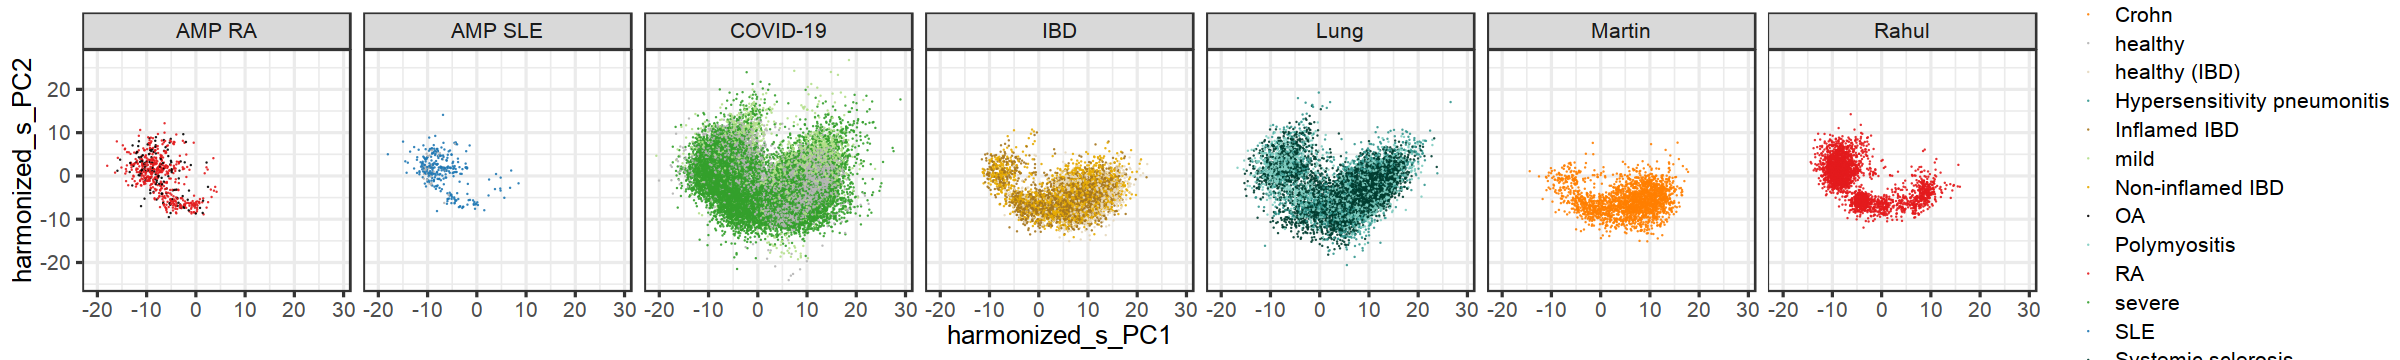

In [24]:
options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_s_PC1, y = harmonized_s_PC2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Correcting dataset only

In [26]:
options(repr.plot.height = 2, repr.plot.width = 4)
harmony_weighted1 <- HarmonyMatrix(pca_res, meta_all, 
                            'dataset', 2, do_pca = FALSE, epsilon.harmony = -Inf, 
                            weights = weights, verbose = FALSE)

colnames(harmony_weighted1) <- paste0("harmonized_d_", colnames(harmony_weighted1), sep="")
meta_all <- cbind(meta_all, harmony_weighted1)
meta_all[1:4,]

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo ... harmonized_d_PC11 harmonized_d_PC12
1 0            0.01430274   ... -0.9061578        0.6332498        
2 0            0.01860410   ...  2.1082182        1.5740987        
3 0            0.01092044   ...  0.7894607        7.2713130        
4 0            0.02241315   ...  3.7700527        1.1500590        
  harmonized_d_PC13 harmonized_d_PC14 harmonized_d_PC15 harmonized_d_PC16
1 -3.3698777         1.6596011        -0.8282308         3.5794564       
2 -0.6431843         1.0981350        -2.4521038         2.4388712       
3 -5.6748325         0.5708121         1.2234044         0.7011787       
4 -3.9557023        -1.8326687        -4.6558218        -2.3300291       
  harmonized_d_PC17 harmonized_d_PC18 harmonized_d_PC19 harmonized_d_PC20
1 5.533784           2.0399083        -0.5315173        -0.3601234       
2 4.907350           1.4662290         0.2558309        -2.4914536       
3 4.579143          -0.6939952        -4.7958241        -0.2418509       
4 3.174677           0.2934053         0.4891961        -4.1832798

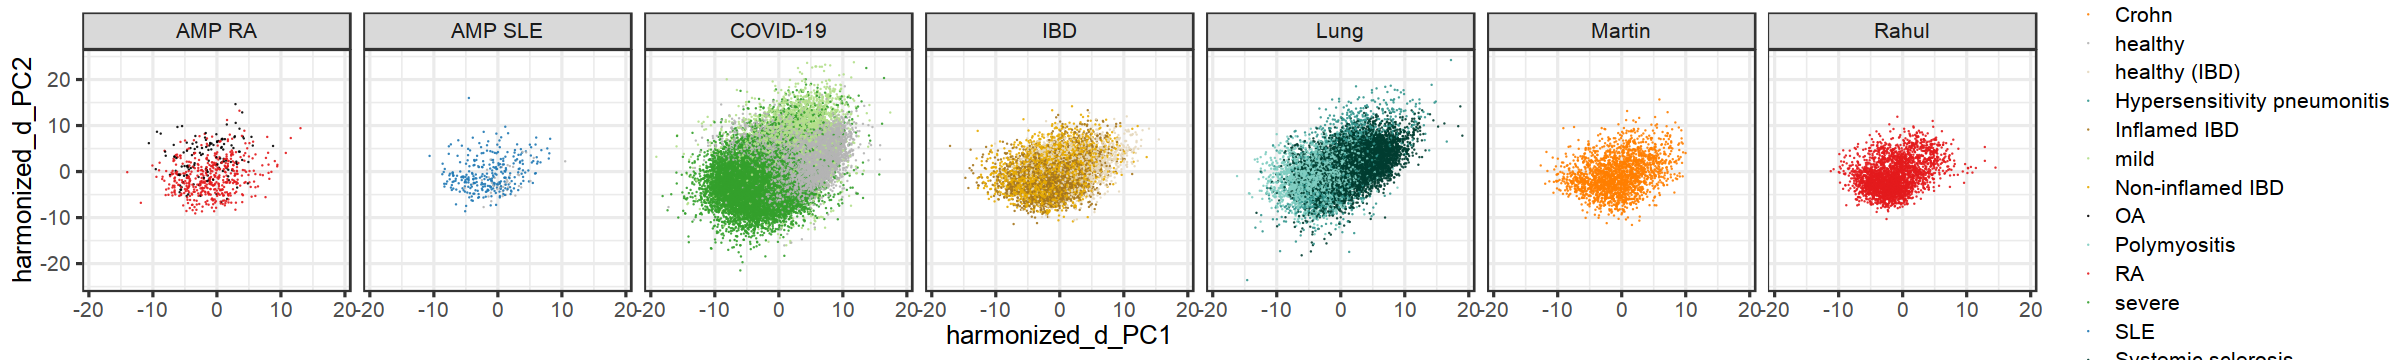

In [27]:
options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_d_PC1, y = harmonized_d_PC2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Correcting sample and dataset simultaneously

In [28]:
options(repr.plot.height = 2, repr.plot.width = 4)
harmony_weighted2 <- HarmonyMatrix(pca_res, meta_all, 
                            c('dataset', 'sample'), c(2, 2), do_pca = FALSE, epsilon.harmony = -Inf, 
                            weights = weights, verbose = FALSE)

colnames(harmony_weighted2) <- paste0("harmonized_ds_", colnames(harmony_weighted2), sep="")
meta_all <- cbind(meta_all, harmony_weighted2)
meta_all[1:4,]

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo ... harmonized_ds_PC11 harmonized_ds_PC12
1 0            0.01430274   ...  0.8452887          0.9832890        
2 0            0.01860410   ... -0.3327074         -0.1730167        
3 0            0.01092044   ... -1.4067615          3.8621389        
4 0            0.02241315   ...  0.8448589          0.4563174        
  harmonized_ds_PC13 harmonized_ds_PC14 harmonized_ds_PC15 harmonized_ds_PC16
1 -1.8509955          1.8435800          1.0709053          0.5886628        
2  0.2327469         -2.1928737          0.1180556          0.6572849        
3 -0.5054344          0.8904935          0.5069777          0.5627087        
4 -1.3388737          0.6106037         -1.1426889         -0.2913684        
  harmonized_ds_PC17 harmonized_ds_PC18 harmonized_ds_PC19 harmonized_ds_PC20
1 1.7738920          -1.8489046          1.275085          -0.73409193       
2 0.7396044           0.6421797         -2.075261           0.16083375       
3 0.8914491          -2.0966459         -1.097354          -0.12903973       
4 1.6498950           0.3606500          2.068488           0.08542751

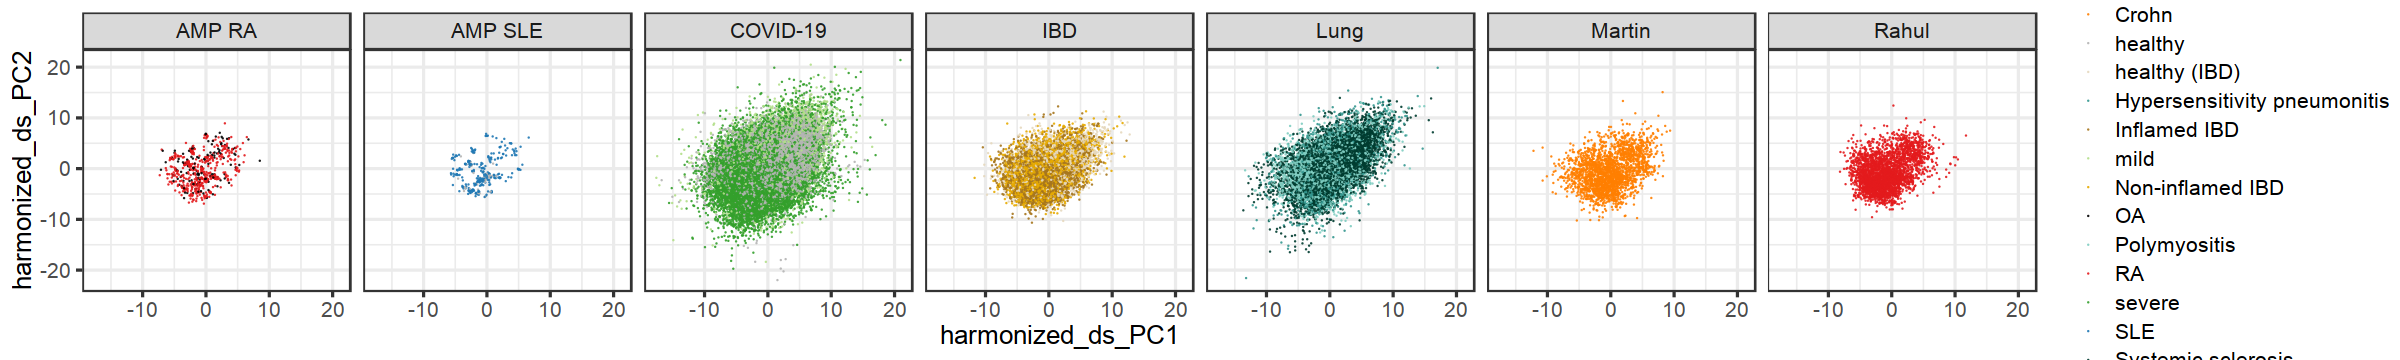

In [29]:
options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_ds_PC1, y = harmonized_ds_PC2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Correcting for samples for the 10X data, correcting dataset for the CEL-seq2 data since each donor sample only has less than 100 cells

In [7]:
meta_all$s_d <- as.character(meta_all$dataset)
meta_all$s_d[which(meta_all$s_d %in% c("COVID-19", "IBD", "Lung", "Martin", "Rahul"))] <- meta_all[which(meta_all$s_d %in% c("COVID-19", "IBD", "Lung", "Martin", "Rahul")), ]$sample

In [35]:
options(repr.plot.height = 2, repr.plot.width = 4)
harmony_weighted4 <- HarmonyMatrix(pca_res, meta_all, 
                            's_d', 2, do_pca = FALSE, epsilon.harmony = -Inf, 
                            weights = weights, verbose = FALSE)

colnames(harmony_weighted4) <- paste0("harmonized_new_", colnames(harmony_weighted4), sep="")
meta_all <- cbind(meta_all, harmony_weighted4)
meta_all[1:4,]

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo ... harmonized_new_PC11 harmonized_new_PC12
1 0            0.01430274   ... -0.09283988         -1.271977          
2 0            0.01860410   ...  2.66901235          4.996588          
3 0            0.01092044   ...  0.47909751          8.763972          
4 0            0.02241315   ...  4.79197059          1.173944          
  harmonized_new_PC13 harmonized_new_PC14 harmonized_new_PC15
1 -3.258906            2.748087           -0.9238324         
2 -5.325767           -1.435692           -5.8399897         
3 -7.325151            0.515196           -0.7922723         
4 -5.701122           -1.809708           -6.2876647         
  harmonized_new_PC16 harmonized_new_PC17 harmonized_new_PC18
1  1.72880449         5.920630             0.07740935        
2  0.03544453         3.919193             0.71228639        
3 -0.17241080         3.097281            -0.34302764        
4 -3.89286278         2.838593            -0.39407403        
  harmonized_new_PC19 harmonized_new_PC20
1  0.8416386           0.04964062        
2 -2.2873844          -5.64913735        
3 -6.0605748          -0.53765841        
4  1.2890874          -4.79605934

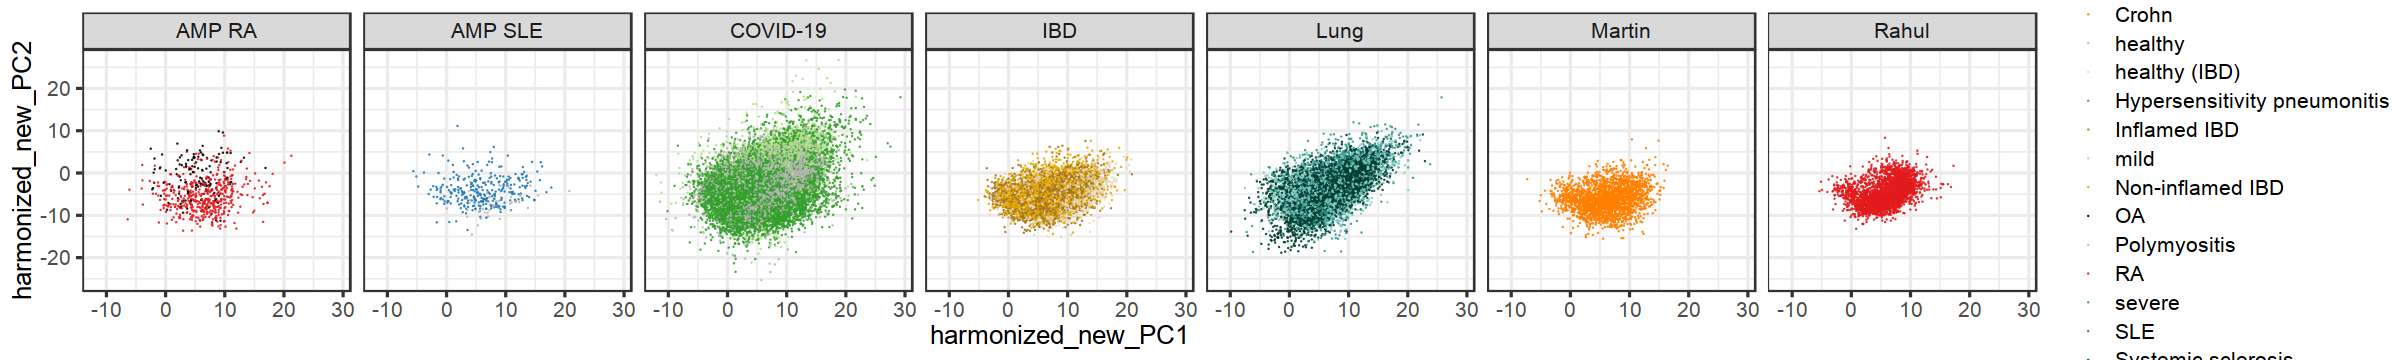

In [36]:
options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_new_PC1, y = harmonized_new_PC2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Visualize UMAP for correcting sample

Warning message:
“package ‘umap’ was built under R version 3.6.3”Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


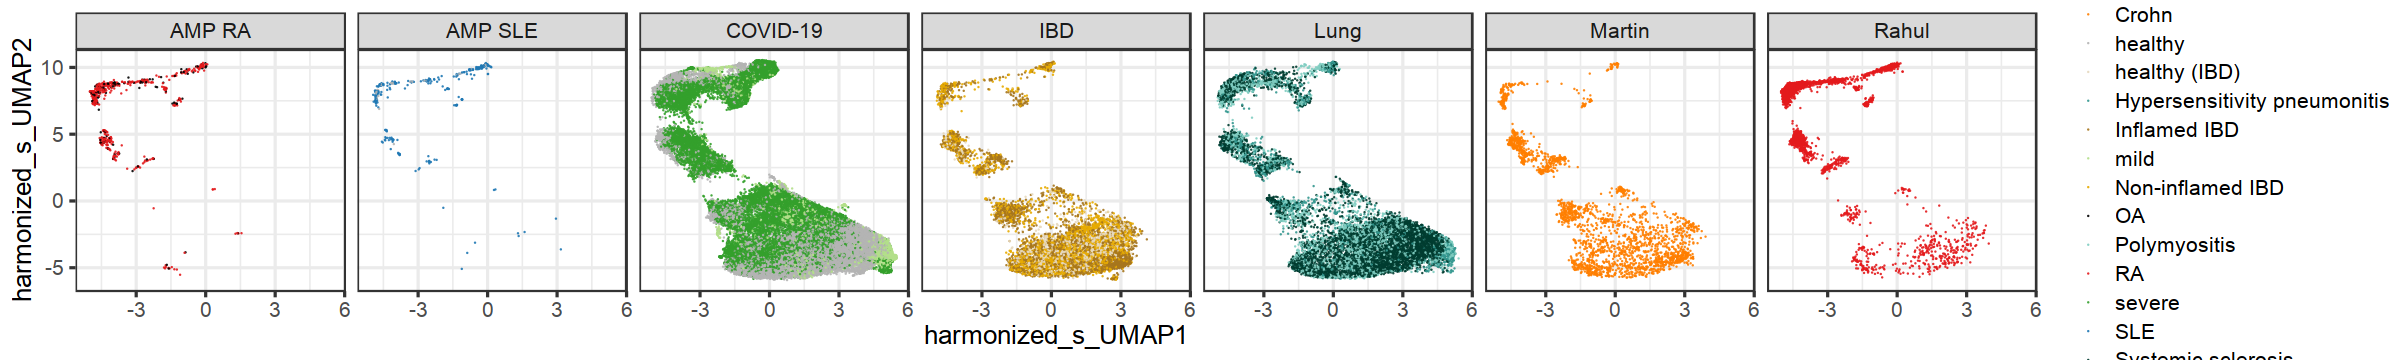

In [31]:
# UMAP with top 20 PCs
library(umap)
umap_res <- umap(harmony_weighted3, n_neighbors = 30, metric = "cosine", min_dist = .1)
meta_all$harmonized_s_UMAP1 <- umap_res$layout[, 1]
meta_all$harmonized_s_UMAP2 <- umap_res$layout[, 2]

options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_s_UMAP1, y = harmonized_s_UMAP2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Visualize UMAP for correcting dataset

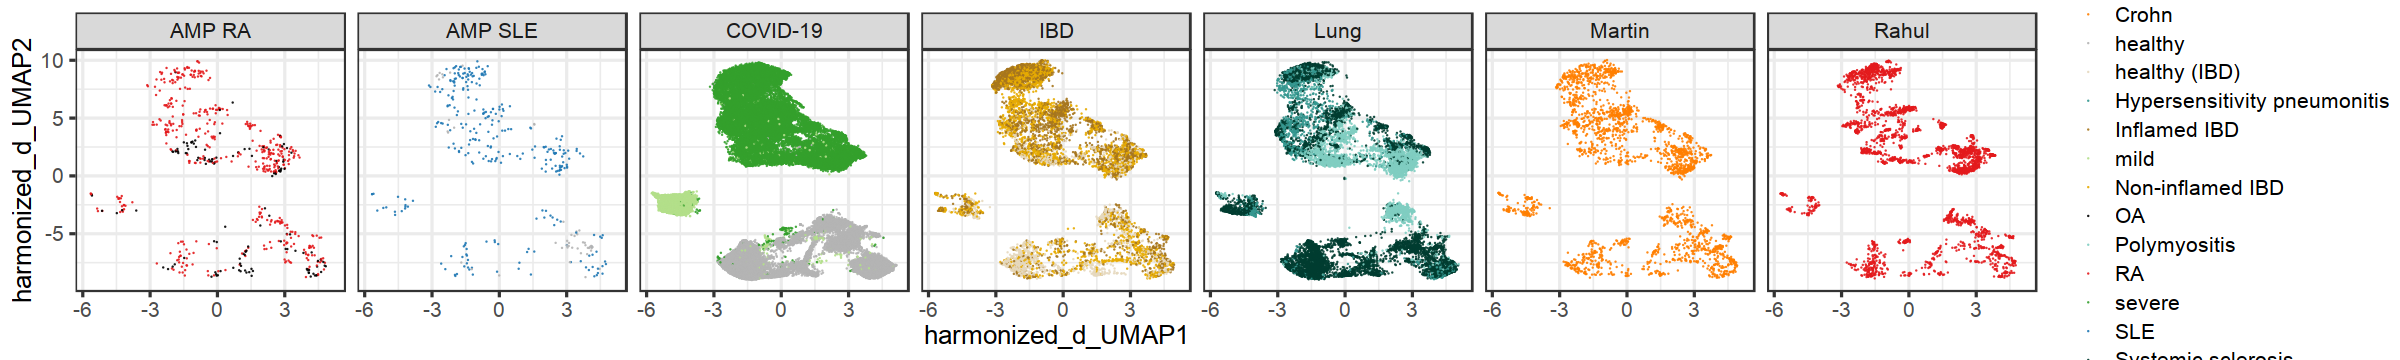

In [32]:
# UMAP with top 20 PCs
library(umap)
umap_res <- umap(harmony_weighted1, n_neighbors = 30, metric = "cosine", min_dist = .1)
meta_all$harmonized_d_UMAP1 <- umap_res$layout[, 1]
meta_all$harmonized_d_UMAP2 <- umap_res$layout[, 2]

options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_d_UMAP1, y = harmonized_d_UMAP2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Visualize UMAP for correcting dataset and sample simultaneous

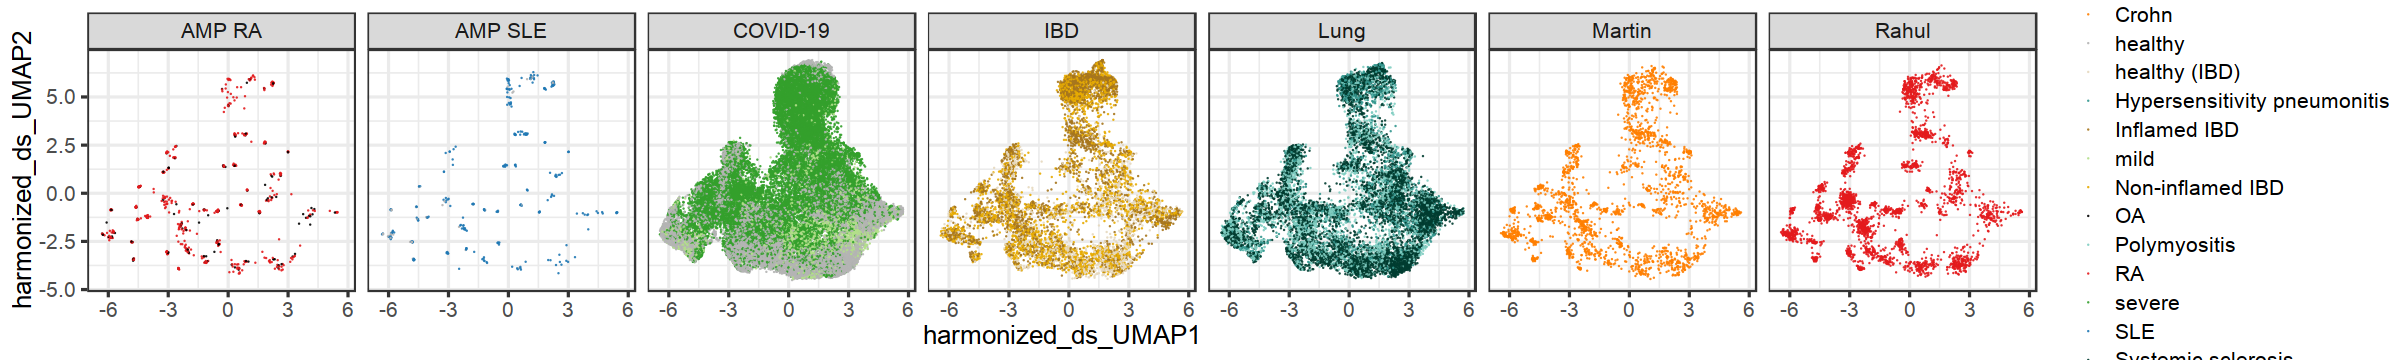

In [33]:
# UMAP with top 20 PCs
library(umap)
umap_res <- umap(harmony_weighted2, n_neighbors = 30, metric = "cosine", min_dist = .1)
meta_all$harmonized_ds_UMAP1 <- umap_res$layout[, 1]
meta_all$harmonized_ds_UMAP2 <- umap_res$layout[, 2]

options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_ds_UMAP1, y = harmonized_ds_UMAP2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

## Visualize UMAP of correcting for samples for the 10X data, correcting dataset for the CEL-seq2 data since each donor sample only has less than 100 cells

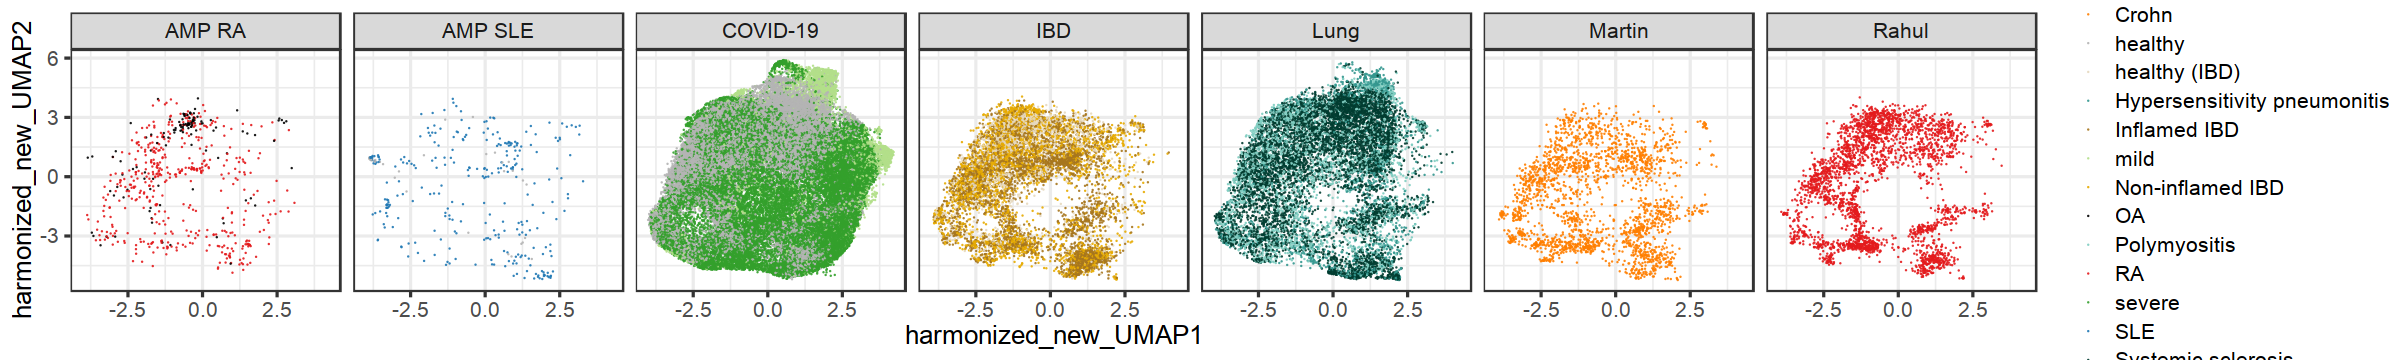

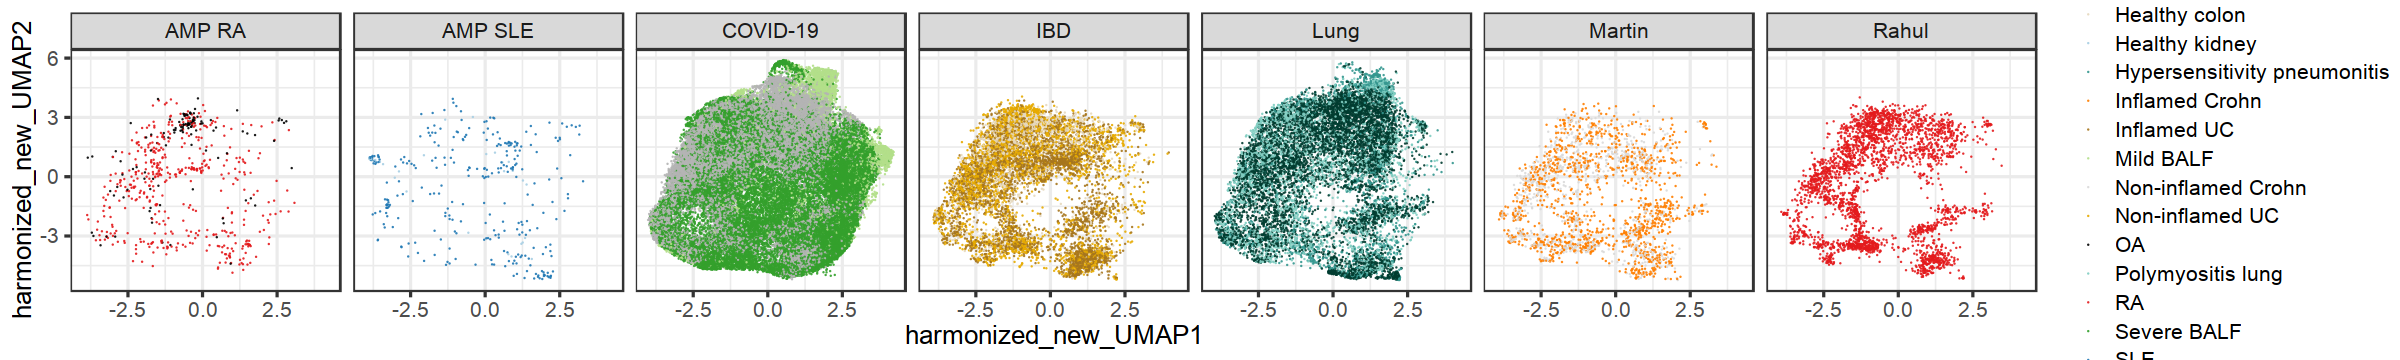

In [53]:
# UMAP with top 20 PCs
library(umap)
umap_res <- umap(harmony_weighted4, n_neighbors = 30, metric = "cosine", min_dist = .1)
meta_all$harmonized_new_UMAP1 <- umap_res$layout[, 1]
meta_all$harmonized_new_UMAP2 <- umap_res$layout[, 2]

options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= disease)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 


options(repr.plot.height = 3, repr.plot.width = 20)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= disease_new)
      ) +
  geom_point(size = 0.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
  facet_wrap( ~ dataset, ncol = 7) +
  scale_fill_manual(values = meta_colors$disease, name = "") +
  theme_bw(base_size = 15) 

In [55]:
# saveRDS(meta_all, "meta_all_weighted_macropahge_cosine_s_d_ds_new_2020_06_09.rds")

# Compare with original clustering lables
## Inflammatory marcorphages from different diseased tissues are clustered together in the integrative embeddings

In [2]:
meta_all <- readRDS("meta_all_weighted_macropahge_cosine_s_d_ds_new_cluster_2020_07_01.rds")

null device 
          1

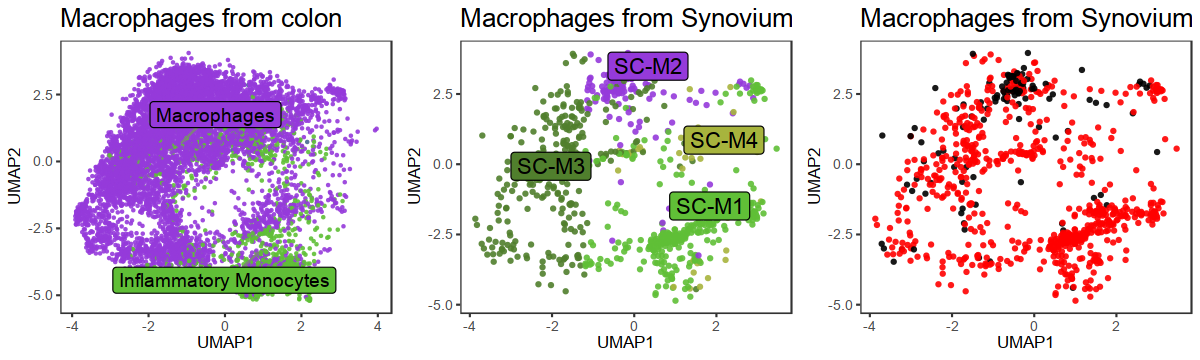

In [43]:
options(repr.plot.height = 3, repr.plot.width = 10)

meta_all$dataset <- as.character(meta_all$dataset)
cluster_center <- meta_all[which(meta_all$dataset == "IBD"),] %>%
                  group_by(cell_type) %>%
                  summarise_at(vars(harmonized_new_UMAP1, harmonized_new_UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$cell_type <- as.character(cluster_center$cell_type)

p1 <- ggplot(meta_all[which(meta_all$dataset == "IBD"),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= cell_type)
      ) +
  geom_point(size = 1, stroke = 0.0001, shape = 21, alpha = 0.9) +
  geom_label_repel(
    data = cluster_center,
    aes(label = cell_type, fill = cell_type),
    size = 4, 
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.2, "lines"),
    segment.color = 'grey50'
  ) +
  scale_fill_manual(values = colors37, name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Macrophages from colon"
      ) +
  theme_bw(base_size = 10) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=15)
)




cluster_center <- meta_all[which(meta_all$dataset == "AMP RA" | meta_all$dataset == "Rahul"),] %>%
                  group_by(cell_type) %>%
                  summarise_at(vars(harmonized_new_UMAP1, harmonized_new_UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$cell_type <- as.character(cluster_center$cell_type)

p2 <- ggplot(meta_all[which(meta_all$dataset == "AMP RA" | meta_all$dataset == "Rahul"),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= cell_type)
      ) +
  geom_point(size = 1.5, stroke = 0.0001, shape = 21, alpha = 0.9) +
  geom_label_repel(
    data = cluster_center,
    aes(label = cell_type, fill = cell_type),
    size = 4.5, 
    box.padding = unit(0.2, "lines"),
    point.padding = unit(0.2, "lines"),
    segment.color = 'grey50'
  ) +
  scale_fill_manual(values = colors37[c(2,3,10,6)], name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Macrophages from Synovium"
      ) +
  theme_bw(base_size = 10) +
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=15)
)


cluster_center <- meta_all[which(meta_all$dataset == "AMP RA" | meta_all$dataset == "Rahul"),] %>%
                  group_by(cell_type) %>%
                  summarise_at(vars(harmonized_new_UMAP1, harmonized_new_UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$cell_type <- as.character(cluster_center$cell_type)

p3 <- ggplot(meta_all[which(meta_all$dataset == "AMP RA" | meta_all$dataset == "Rahul"),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= disease_new)
      ) +
  geom_point(size = 1.5, stroke = 0.0001, shape = 21, alpha = 0.9) +
  scale_fill_manual(values = c("black", "red"), name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Macrophages from Synovium"
      ) +
  theme_bw(base_size = 10) +
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=15)
)

null device 
          1

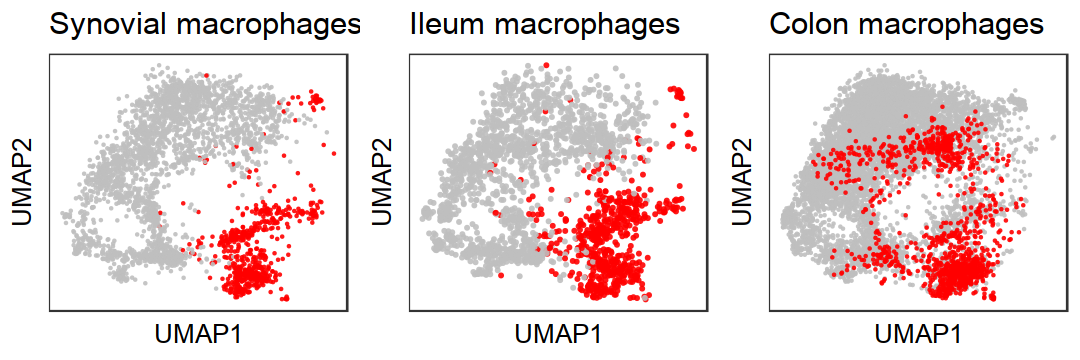

In [68]:
options(repr.plot.height = 3, repr.plot.width = 9)

meta_all$highligh_UC <- rep("macrophages", nrow(meta_all))
meta_all[which(meta_all$cell_type == "Inflammatory Monocytes" & meta_all$dataset == "IBD"),]$highligh_UC <- "Inflammatory macrophages"
meta_temp <- meta_all[which(meta_all$dataset == "IBD"),]
p1 <- ggplot(meta_temp[rev(order(meta_temp$highligh_UC)),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= highligh_UC)
      ) +
  geom_point(size = 1, stroke = 0.0001, shape = 21, alpha = 0.9) +
  scale_fill_manual(values = c("red", "grey"), name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Colon macrophages"
      ) +
  theme_bw(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
)

# Put AMP and Rahul together
meta_all$highligh_RA <- rep("macrophages", nrow(meta_all))
meta_all[which(meta_all$cell_type == "Inflammatory Monocytes" & meta_all$dataset == "RA"),]$highligh_RA <- "Inflammatory monocytes"
meta_temp <- meta_all[which(meta_all$disease_new == "RA"),]
p2 <- ggplot(meta_temp[sample(nrow(meta_temp)),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= highligh_RA)
      ) +
  geom_point(size = 1, stroke = 0.0001, shape = 21, alpha = 0.9) +
#   ylim(-5.5, 6) +
  scale_fill_manual(values = c("red", "grey"), name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Synovial macrophages"
      ) +
  theme_bw(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
)



meta_all$highligh_CD <- rep("macrophages", nrow(meta_all))
meta_all[which(meta_all$cell_type == "Inflammatory Monocytes" & meta_all$dataset == "Martin"),]$highligh_CD <- "Inflammatory monocytes"
meta_temp <- meta_all[which(meta_all$dataset == "Martin"),]
p3 <- ggplot(meta_temp[sample(nrow(meta_temp)),],
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= highligh_CD)
      ) +
  geom_point(size = 1.4, stroke = 0.0001, shape = 21, alpha = 0.9) +
#   ylim(-5,6) +
  scale_fill_manual(values = c("red", "grey"), name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2",
      title = "Ileum macrophages"
      ) +
  theme_bw(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=18)
)

all <- grid.arrange(p2, p3, p1, ncol = 3)
ggsave(file = paste("old_inflammatory_mono_lables", ".png", sep = ""), all, width = 9, height = 3, dpi = 300)
dev.off()

## Build SNN

In [56]:
library(parallel)
snn_pcs <- BuildSNNSeurat(harmony_weighted4, nn.eps = .5)
dim(snn_pcs)
snn_pcs[1:4,1:4]

[1] 74475 74475

4 x 4 sparse Matrix of class "dgCMatrix"
              S006_L1Q1_G01 S006_L1Q1_G03 S006_L1Q1_G05 S006_L1Q1_G07
S006_L1Q1_G01             1     .                     .     .        
S006_L1Q1_G03             .     1.0000000             .     0.1764706
S006_L1Q1_G05             .     .                     1     .        
S006_L1Q1_G07             .     0.1764706             .     1.0000000

## For weighted clustering, weigh the SNN before passing it to Louvain

In [57]:
snn_pcs <- snn_pcs %*% Matrix::Diagonal(x = weights) 
dim(snn_pcs)
snn_pcs[1:4,1:4]

[1] 74475 74475

4 x 4 sparse Matrix of class "dgCMatrix"
              S006_L1Q1_G01 S006_L1Q1_G03 S006_L1Q1_G05 S006_L1Q1_G07
S006_L1Q1_G01      17.85115      .              .            .       
S006_L1Q1_G03       .           17.851151       .            3.150203
S006_L1Q1_G05       .            .             17.85115      .       
S006_L1Q1_G07       .            3.150203       .           17.851151

## Louvain clustering

In [58]:
resolution_list <- c(0.2, 0.4, 0.6)
ids_cos <- Reduce(cbind, mclapply(resolution_list, function(res_use) {
    Seurat:::RunModularityClustering(SNN = snn_pcs, modularity = 1, 
        resolution = res_use, algorithm = 3, n.start = 10, 
        n.iter = 10, random.seed = 0, print.output = FALSE, 
        temp.file.location = NULL, edge.file.name = NULL)    
}, mc.cores = min(16, length(resolution_list))))
ids_cos %<>% data.frame()
colnames(ids_cos) <- sprintf("res_%.2f", resolution_list)

meta_all$res_0.20 <- ids_cos$res_0.20
meta_all$res_0.40 <- ids_cos$res_0.40
meta_all$res_0.60 <- ids_cos$res_0.60

meta_all[1:4,]
# saveRDS(meta_all, "meta_all_weighted_macropahge_cosine_s_d_ds_new_cluster_2020_06_09.rds")

cell          dataset technology sample   disease cell_type nUMI nGene
1 S006_L1Q1_G01 AMP RA  Celseq     301-0159 OA      SC-M3     1678  878 
2 S006_L1Q1_G03 AMP RA  Celseq     301-0159 OA      SC-M2     8439 2608 
3 S006_L1Q1_G05 AMP RA  Celseq     301-0159 OA      SC-M2     5769 2343 
4 S006_L1Q1_G07 AMP RA  Celseq     301-0159 OA      SC-M2     5354 2031 
  percent_mito percent.ribo ... harmonized_new_PC18 harmonized_new_PC19
1 0            0.01430274   ...  0.07740935          0.8416386         
2 0            0.01860410   ...  0.71228639         -2.2873844         
3 0            0.01092044   ... -0.34302764         -6.0605748         
4 0            0.02241315   ... -0.39407403          1.2890874         
  harmonized_new_PC20 harmonized_new_UMAP1 harmonized_new_UMAP2
1  0.04964062         -1.9311257           0.2153628           
2 -5.64913735         -0.6626992           2.5323367           
3 -0.53765841         -0.2915412           3.2072371           
4 -4.79605934         -0.9450107           2.2334536           
  harmonized_new2_UMAP1 harmonized_new2_UMAP2 res_0.20 res_0.40 res_0.60
1 -2.518698             1.025954              0        1        1       
2 -1.741722             3.764394              0        8        9       
3 -1.379475             4.717002              0        8        9       
4 -2.384813             2.122873              0        8        9

## Identify main shared clusters

null device 
          1

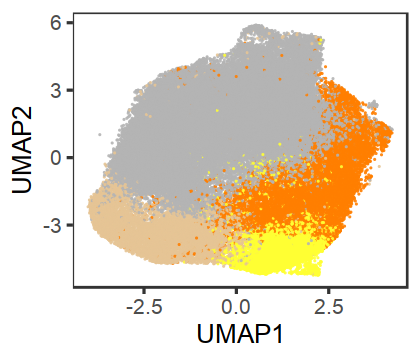

In [7]:
cluster_center <- meta_all %>%
                  group_by(res_0.20_annot) %>%
                  summarise_at(vars(harmonized_new_UMAP1, harmonized_new_UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$res_0.20_annot <- as.character(cluster_center$res_0.20_annot)

options(repr.plot.height = 3, repr.plot.width = 3.5)
ggplot(meta_all,
       aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2, fill= res_0.20_annot)
      ) +
  geom_point(size = 0.6, stroke = 0.0001, shape = 21, alpha = 0.9) +
  scale_fill_manual(values = c( "#FFFF33",  "#FF7F00", "#B3B3B3", "#E5C494"), name = "") +
  labs(
      x = "UMAP1",
      y = "UMAP2"
      ) +
  theme_bw(base_size = 15) +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=15, face = "italic")
)
ggsave(file = paste("new_mono_cluster", ".png", sep = ""), width = 4, height = 3.5, dpi = 300)
dev.off()

## Plot some key gene signatures

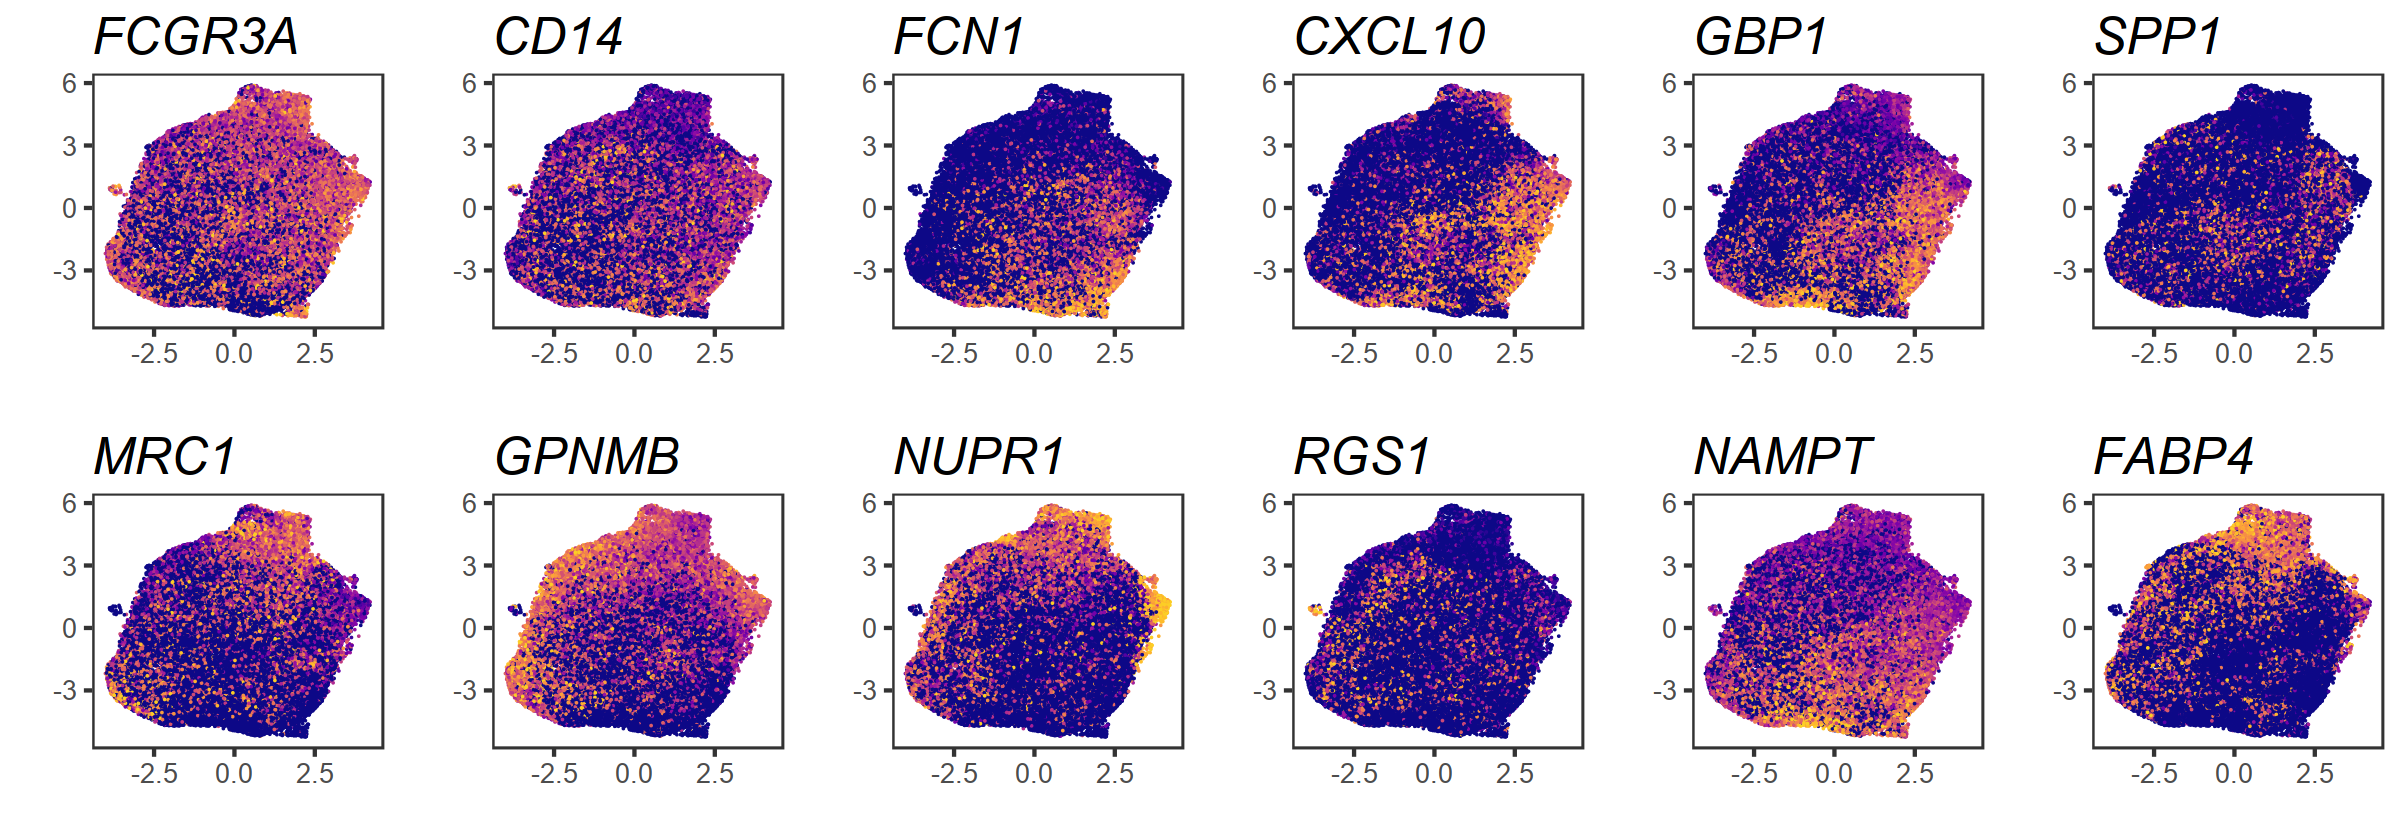

In [114]:
plot_gene <- c("FCGR3A", "CD14", "FCN1", "CXCL10", "GBP1", "SPP1",  "MRC1", "GPNMB", "NUPR1", "RGS1",
              "NAMPT", "FABP4")

myplots <- list()
for (i in 1:length(plot_gene)) {
  gene <- plot_gene[i]
    
    max.cutoff = quantile(exprs_norm[gene,], .99)
    min.cutoff = quantile(exprs_norm[gene,], .01)

    tmp <- sapply(X = exprs_norm[gene,], FUN = function(x) {
        return(ifelse(test = x > max.cutoff, yes = max.cutoff,
            no = x))
    })
    tmp <- sapply(X = tmp, FUN = function(x) {
        return(ifelse(test = x < min.cutoff, yes = min.cutoff,
            no = x))
    })
  
    meta_all$gene <- as.numeric(tmp)

    
   ind <- paste("p", i, sep = "")
   ind <- ggplot(
                 data = meta_all[sample(nrow(meta_all)),],
                 aes(x = harmonized_new_UMAP1, y = harmonized_new_UMAP2)) + 
      geom_point(mapping = aes(color = gene), size = 0.0001) + 
      scale_color_viridis(option = "plasma", end = .9) +
      labs(x="", y="")+
      theme_bw(base_size = 20)+
      theme(
        panel.grid = element_blank(),
        plot.title = element_text(color="black", size=30, face="italic"),
        legend.position = "none") +
      labs(title = gene)
   myplots[[i]] <- ind
}

options(repr.plot.height = 7, repr.plot.width = 20)
p <- do.call("grid.arrange", c(myplots, ncol = 6))
ggsave(file = paste("new_mono_gene_umap", ".png", sep = ""), p, width = 20, height = 7, dpi = 300)